# Module 05_01: Introduction to Intel® Extension for Scikit-learn*: GPU


You are going to generate scores proving you communicated successfully and did sklearn computation on Intel GPU

![Assets/GalleryScores.png](Assets/GalleryScores.png)

<a id='Back_to_Sections'></a>

## Sections
- [Examine Optimized Functions in Sklearnex for GPU](#Examine-All-Optimized-Functions-in-Sklearnex)
- [Demonstrate usage of Intel® Extension for Scikit-learn with kmeans using patch_sklearn](#Demonstrate-usage-of-Intel-Extension-for-Scikit-learn-with-kmeans-using-patch_sklearn)
- [Compare timings of stock kmeans versus Intel® Extension for Scikit-learn kmeans](#Compare-timings-of-stock-kmeans-versus-Intel-Extension-for-Scikit-learn-kmeans)
- [Introduction to Daal4py](#Introduction-to-Daal4py)
- [oneAPI and GPU support in Intel® Extension for Scikit learn*](oneAPI-and-GPU-support-in-Intel-Extension-for-Scikit-learn*)
- [Plot DBSCAN results as computed on GPU](#Plot-DBSCAN-results-as-computed-on-GPU)


## Learning Objectives

* In this moduel you will learn **HOW** to apply patching while targeting an Intel GPU.
* Apply Intel Extension for Scikit-learn to RandomForest on Intel GPU
* This current notebook is **NOT** intended to demonstrate performance but rather the functionality of HOW to target current and future Intel GPU's with Scikit-learn algorithms powered by oneAPI.




The following code demonstrates usage of Intel(R) Extension for Scikit-learn. Inspect code; there are no modifications necessary:
1. Inspect the following code cell and click Run (▶)to save the code to file.
2. Next, run (▶) the cell in the __Build and Run__ section following the code to compile and execute the code.

# Examine Which Scikit-learn* Are Optimized in Sklearnex

These following are the currently optimized functions optimized with Intel(r) Extensions for scikit learn

- [Back to Sections](#Back_to_Sections)

In [1]:
import pandas as pd
sklearnex_gallery = pd.read_csv('data/sklearnex_gallery_gpu.csv')
sklearnex_gallery

,Acronym,Name,What is it used for,Advantages,Disadvantages
0,dbscan,Density-based spatial clustering of applicatio...,Density-based spatial clustering of applicatio...,does not require one to specify the number of ...,scklearnex must only use ‘euclidean’ or ‘minko...
1,kmeans,K-Means clustering.,KMeans algorithm clusters data by trying to se...,Relatively simple to implement. Scales to larg...,intel sklearnex: All parameters except precomp...
2,kneighborsclassifier,K Nearest Neighbors Classifier,Classifier: Find the K-neighbors of a point. R...,K-NN is pretty intuitive and simple: \nK-NN al...,Intel sklearex: All parameters except algorit...
3,kneighborsregressor,K Nearest Neighbors Regressor,Regressor: Find the K-neighbors of a point. Re...,K-NN is pretty intuitive and simple: \nK-NN al...,Intel sklearex: All parameters except algorit...
4,linear,Linear Regression,Fitting line of best fit through data,Simple method \nGood interpretation \nEasy to...,Intel sklearnex: All parameters except normali...
5,logistic,Logistic Regression,Classifier: Generally used for quick binary cl...,Doesn’t assume linear relationship between ind...,Intel sklearnex: All parameters solver must N...
6,pca,Principal Component Analysis (PCA),Dimensionality reduction. Pre processto reduce...,PCA can help us improve performance at a very ...,intel sklearnex: All parameters svd_solver MU...
7,random_forest_classifier,Random Forest Classifier,Classifier: A random forest produces good pred...,"One third of data is not used for training, he...","SKLEARNEX: warm_start must be False,cpp_alpha ..."
8,random_forest_regressor,Random Forest Regressor,Regressor: A random forest produces good predi...,"One third of data is not used for training, he...","SKLEARNEX: warm_start must be False,cpp_alpha ..."
9,svc,Support Vector Classifier,Classification: requires X & y. It is based o...,1. Regularization capabilities: SVM has L2 Reg...,SKLEARNEX: Only binary dense data is supported...


In [2]:
def print_gallery_details(acroynm, column):
    print(sklearnex_gallery[sklearnex_gallery['Acronym'] == acroynm][column].tolist()[0])

details = ['What is it used for', 'Advantages', 'Disadvantages']
print_gallery_details('svc', 'Advantages')

1. Regularization capabilities: SVM has L2 Regularization feature. So, it has good generalization capabilities which prevent it from over-fitting.   
2. Handles non-linear data efficiently: SVM can efficiently handle non-linear data using Kernel trick.   
3. Solves both Classification and Regression problems: SVM can be used to solve both classification and regression problems. SVM is used for classification problems while SVR (Support Vector Regression) is used for regression problems.   4. Stability: A small change to the data does not greatly affect the hyperplane and hence the SVM. So the SVM model is stable.


## oneAPI and GPU support in Intel Extension for Scikit learn*
DPCTL is the python mechanism used to interface to SYCL device management. It is implemented via with sycl_context("xpu") blocks that redirect execution to a device of the selected type: GPU, CPU, or host. scikit-learn programs can be executed on GPU devices as well.

- [Back to Sections](#Back_to_Sections)

To patch your code with Intel CPU/GPU optimizations:

The following code demonstrates usage of simple DPPY code. Inspect code; there are no modifications necessary:
1. Inspect the following code cell and click Run (▶)to save the code to file.
2. Next, run (▶) the cell in the __Build and Run__ section following the code to compile and execute the code.

# Regarding when/how to cast to and from dpctl.tensors

This information bears repeating: to make sure the concept is clear.

Study the code sectons near the conversion to and from dptcl/Numpy

For all sklearnex alogorithms - it will be necessary to cast the X and/or y data passed as the parameter list to dpctl tensor in order for the GPU to access the data and performan the computation.

### Examples casting from numpy to dpctl version 12 and later:
```python
x_device = dpctl.tensor.asarray(X, usm_type = 'device', device = "gpu:0")
y_device = dpctl.tensor.asarray(y, usm_type = 'device', device = "gpu:0")
```
Pay attention ot **return** types from:
- **fit** - many cases in scikit-learn, fit returns selfobject
- **fit_predict** - returns **ndarray** requires casting after the call on host (to_numpy)
- **predict** -  returns **ndarray** requires casting after the call on host (to_numpy)
- **fit_transform** - returns returns **ndarray** requires casting after the call on host (to_numpy)
- **tranform** - typically returns **ndarray** requires casting after the call on host (to_numpy)

Scikit-learn routines that potentially return ndarray type objects or which expect ndtype objects passed as a parameter will need to be cast to/from numpy from/to dpctl.tensor

To cast data being fed TO one of these routines:
- use dpctl.tensor.from_numpy() to conver from NumPy to dpctl tensor
- use dpctl.tensor.to_numpy() to convert from dpctl tensor to NumPy

Example: After a call to fit_predict:
- **catch_device** = estimator.fit_predict(**x_device**, **y_device**)
- **predictedHost** = dpctl.tensor.to_numpy(**catch_device**)


# Simple Compute Follows Data and Patching for kmeans

- [Back to Sections](#Back_to_Sections)

In [3]:
import dpctl
print("dpctl.__version__ = ",dpctl.__version__)

dpctl.__version__ =  0.16.0


In [4]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [5]:
#===============================================================================
# Copyright 2023 Intel Corporation
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#===============================================================================

# Calling scikit-learn patch - this would enable acceleration on all
# enabled algorithms. This is most straight forward way of patching
from sklearnex import patch_sklearn
patch_sklearn()

# Function that can validate current state of patching
# from sklearnex import sklearn_is_patched
# sklearn_is_patched()

# Calling scikit-learn unpatch - this would revert patching for all algorithms
# from sklearnex import unpatch_sklearn
# unpatch_sklearn()

# Direct import of functions in way aligned with scikit-learn
from sklearnex.neighbors import NearestNeighbors

#Patching can be enabled for selected algorithms/estimators only
patch_sklearn(["DBSCAN"])

#Remaining non modified scikit-learn codes
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(
    n_samples=750, centers=centers, cluster_std=0.4, random_state=0
)

X = StandardScaler().fit_transform(X)

from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X) # Compute follows data here and X is on CPU
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)

Estimated number of clusters: 3
Estimated number of noise points: 18


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)
Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [6]:
# x_device = dpctl.tensor.asarray(X,  device = device)
device = dpctl.select_default_device()

# Exercise:

Apply Patch and Compute Follows Data. 

New with the Intel Developer Cloud, the cell below executes on the instance's GPU directly, no need to use writefile and the qsubmission process.

In [7]:
# Copyright 2021 Intel Corporation
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

import numpy as np

################################################################
#
# Import dptcl and patch here

import dpctl
print("dpctl.__version__ = ", dpctl.__version__)

from sklearnex import patch_sklearn
patch_sklearn()
#
################################################################

X = np.array([[1,  2], [1,  4], [1,  0],
              [10, 2], [10, 4], [10, 0]])

# You need to re-import scikit-learn algorithms after the patch
from sklearn.cluster import KMeans

device = dpctl.select_default_device()
print("Using device ...")
device.print_device_info()

x_device = dpctl.tensor.asarray(X,  device = device)
#x_device = dpctl.tensor.to_numpy(X,  device = device)

kmeans = KMeans(n_clusters=2, init='random', random_state=0).fit(x_device)
print(f"kmeans.labels_ = {kmeans.labels_}")

dpctl.__version__ =  0.16.0
Using device ...
    Name            Intel(R) Data Center GPU Max 1100
    Driver version  1.3.28202
    Vendor          Intel(R) Corporation
    Filter string   level_zero:gpu:0



Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


kmeans.labels_ = [1. 1. 1. 0. 0. 0.]


## Exercise:

Apply Patch and Compute Follows Data.The code below using writfilel and the qsub process is rtatined for backward compatibility with the old "Colfax" DevCloud.

In [8]:
#%%writefile lab/scikit_kmeans.py

# Copyright 2021 Intel Corporation
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

import numpy as np

################################################################
#
# Import dptcl and patch here

import dpctl
print("dpctl.__version__ = ", dpctl.__version__)

from sklearnex import patch_sklearn
patch_sklearn()
#
################################################################

X = np.array([[1,  2], [1,  4], [1,  0],
              [10, 2], [10, 4], [10, 0]])

# You need to re-import scikit-learn algorithms after the patch
from sklearn.cluster import KMeans

device = dpctl.select_default_device()
print("Using device ...")
device.print_device_info()

x_device = dpctl.tensor.asarray(X,  device = device)
#x_device = dpctl.tensor.to_numpy(X,  device = device)

kmeans = KMeans(n_clusters=2, init='random', random_state=0, n_init='auto').fit(x_device)
print(f"kmeans.labels_ = {kmeans.labels_}")


dpctl.__version__ =  0.16.0
Using device ...
    Name            Intel(R) Data Center GPU Max 1100
    Driver version  1.3.28202
    Vendor          Intel(R) Corporation
    Filter string   level_zero:gpu:0

kmeans.labels_ = [1. 1. 1. 0. 0. 0.]


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


We observe that with scikit-learn-intelex patching you can:

Use your scikit-learn code for training and prediction with minimal changes (a couple of lines of code);
Fast execution training and prediction of scikit-learn models;
Get the same quality.

## Examine Compute Follows Data on Intel GPU with DBSCAN

In [9]:
from sklearn.cluster import DBSCAN
#?DBSCAN.fit

In [10]:
#%%writefile lab/scikit_dbscan.py

# Copyright 2021 Intel Corporation
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#      http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

import dpctl
print("dpctl.__version__ = ", dpctl.__version__)

from sklearnex import patch_sklearn
patch_sklearn()

import pandas as pd
import numpy as np
import os
from sklearn.cluster import DBSCAN

X = np.array([[1., 2.], [2., 2.], [2., 3.],
            [8., 7.], [8., 8.], [25., 80.]], dtype=np.float32)


device = dpctl.select_default_device()
print("Using device ...")
device.print_device_info()


# x_device = dpctl.tensor.from_numpy(X, 
#             usm_type = 'device', device = "gpu:0") 

x_device = dpctl.tensor.from_numpy(X, 
            usm_type = 'device', device = device) 

clustering_host = DBSCAN(eps=3, min_samples=2).fit(x_device)

print("DBSCAN.get_params: ",DBSCAN.get_params)
print('data type clustering_host.labels_', type(clustering_host.labels_))

# write meaningful cluster info to a CSV 
clustering_labels = pd.DataFrame(clustering_host.labels_)
clustering_labels.to_csv('data/DBSCAN_Labels.csv', index=False )

clustering_components = pd.DataFrame(clustering_host.components_)
clustering_components.to_csv('data/DBSCAN_Components.csv', index=False )

print("DBSCAN components: ", clustering_host.components_, "\nDBSCAN labels: ",clustering_host.labels_)

dpctl.__version__ =  0.16.0
Using device ...
    Name            Intel(R) Data Center GPU Max 1100
    Driver version  1.3.28202
    Vendor          Intel(R) Corporation
    Filter string   level_zero:gpu:0

DBSCAN.get_params:  <function BaseEstimator.get_params at 0x14e0728af0d0>
data type clustering_host.labels_ <class 'numpy.ndarray'>


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


DBSCAN components:  [] 
DBSCAN labels:  [ 0  0  0  1  1 -1]


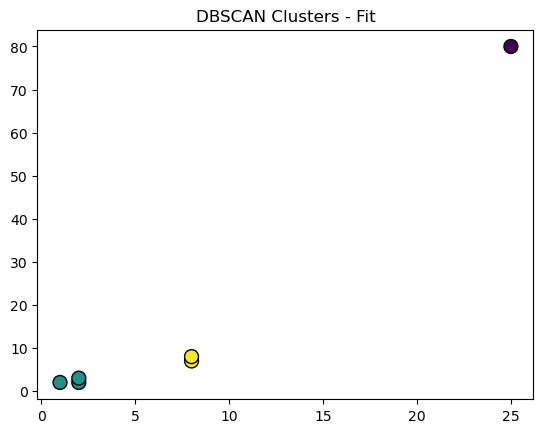

In [12]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

X = np.array([[1., 2.], [2., 2.], [2., 3.],
            [8., 7.], [8., 8.], [25., 80.]], dtype=np.float32)

data_dir = os.getcwd()+'/data'

labels = pd.read_csv(f'{data_dir}/DBSCAN_Components.csv')
labels = pd.read_csv(f'{data_dir}/DBSCAN_Labels.csv')

plt.title('DBSCAN Clusters - Fit')
plt.scatter(X[:, 0], X[:, 1], s=100, c=labels.iloc[:,0].tolist(), edgecolor="k")
plt.show()

# Use GPU to Fit, then use model to predict on host

We will test this method of **fitting on Intel GPU**, and **predicting on Intel CPU** over the following routines:
- **k_means_random**
- **linear_regression**
- **logistic_regression_lbfgs**
- **dbscan**

# Exercise: First Steps:
- import and apply the patch
- hint: 

- from sklearnex import patch_sklearn
- patch_sklearn()

This exercise will fail, unless the patch is correctly applied

In [ ]:
#%%writefile lab/dpctl_several_functions.py

#===============================================================================
# Copyright 2014-2021 Intel Corporation
#
# Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
#     http://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.
#===============================================================================


import numpy as np

############ Apply Patch first here #################################
import dpctl
print("dpctl.__version__ = ", dpctl.__version__)

from sklearnex import patch_sklearn
patch_sklearn()
#####################################################################

from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import DBSCAN

from sklearn.datasets import load_iris

def k_means_random(gpu_device):
    print("KMeans init='random'")
    X = np.array([[1., 2.], [1., 4.], [1., 0.],
                  [10., 2.], [10., 4.], [10., 0.]], dtype=np.float32)

    # target a remote hosy CPU when submitted via q.sh or qsub -I
    x_device = dpctl.tensor.from_numpy(X, usm_type = 'device', device = "gpu:0") #dpctl 0.12

    kmeans = KMeans(n_clusters=2, random_state=0, init='random',n_init='auto').fit(x_device)
    #kmeans = KMeans(n_clusters=2).fit(x_device)

    print("kmeans.labels_")
    print(kmeans.labels_)
    print("kmeans.predict([[0, 0], [12, 3]])")
    print(kmeans.predict(np.array([[0, 0], [12, 3]], dtype=np.float32)))
    print("kmeans.cluster_centers_")
    print(kmeans.cluster_centers_)


def linear_regression(gpu_device):
    print("LinearRegression")
    X = np.array([[1., 1.], [1., 2.], [2., 2.], [2., 3.]], dtype=np.float32)
    # y = 1 * x_0 + 2 * x_1 + 3
    y = np.dot(X, np.array([1, 2], dtype=np.float32)) + 3

    # target a remote hosy CPU when submitted via q.sh or qsub -I
    x_device = dpctl.tensor.asarray(X, usm_type = 'device', device = "gpu:0") #dpctl 0.12
    y_device = dpctl.tensor.asarray(y, usm_type = 'device', device = "gpu:0") #dpctl 0.12  

    reg = LinearRegression().fit(x_device, y_device)
    print("reg.score(X, y)")
    print(reg.score(X, y))
    print("reg.coef_")
    print(reg.coef_)
    print("reg.intercept_")
    print(reg.intercept_)
    print("reg.predict(np.array([[3, 5]], dtype=np.float32))")
    print(reg.predict(np.array([[3, 5]], dtype=np.float32)))


def logistic_regression_lbfgs(gpu_device):
    print("LogisticRegression solver='lbfgs'")
    X, y = load_iris(return_X_y=True)

    x_device = dpctl.tensor.from_numpy(X, usm_type = 'device', device = "gpu:0") #dpctl 0.12
    y_device = dpctl.tensor.from_numpy(y, usm_type = 'device', device = "gpu:0") #dpctl 0.12

    clf = LogisticRegression(random_state=0, solver='lbfgs').fit(
        x_device,
        y_device)
    print("clf.predict(X[:2, :])")
    print(clf.predict(X[:2, :]))
    print("clf.predict_proba(X[:2, :])")
    print(clf.predict_proba(X[:2, :]))
    print("clf.score(X, y)")
    print(clf.score(X, y))

def dbscan(gpu_device):
    print("DBSCAN")
    X = np.array([[1., 2.], [2., 2.], [2., 3.],
                  [8., 7.], [8., 8.], [25., 80.]], dtype=np.float32)
    
    #x_device = dpctl.tensor.from_numpy(X, usm_type = 'device', queue=dpctl.SyclQueue(gpu_device))    
    # target a remote hosy CPU when submitted via q.sh or qsub -I

    x_device = dpctl.tensor.from_numpy(X, usm_type = 'device', device = "gpu:0") #dpctl 0.12        

    clustering = DBSCAN(eps=3, min_samples=2).fit(x_device)
    print("clustering.labels_")
    print(clustering.labels_)
    print("clustering")
    print(clustering)

if __name__ == "__main__":
    examples = [
        k_means_random, 
        dbscan,
        linear_regression,
        logistic_regression_lbfgs,
    ]

#     gpu_device = dpctl.select_default_device()
#     print("Using device ...")
#     gpu_device.print_device_info()

    for d in dpctl.get_devices():
        gpu_available = False
        for d in dpctl.get_devices():
            if d.is_gpu:
                gpu_device = dpctl.select_gpu_device()
                gpu_available = True
            else:
                cpu_device = dpctl.select_cpu_device() 
    if gpu_available:
        print("GPU targeted: ", gpu_device)
    else:
        print("CPU targeted: ", cpu_device)
       
    device = gpu_device
    for e in examples:
        print("*" * 80)
        try:
            e(device)
        except:
            print(e, " Failed")
        print("*" * 80)

    print('All looks good!')

# Summary
In this module you will have learned the following:
* How to target algorithms optimized by Intel Extensions for Scikit-learn* to run on Intel GPU using "Compute Follows Data"

# Notices & Disclaimers 

Intel technologies may require enabled hardware, software or service activation.
No product or component can be absolutely secure.

Your costs and results may vary.

© Intel Corporation. Intel, the Intel logo, and other Intel marks are trademarks of Intel Corporation or its subsidiaries. 
*Other names and brands may be claimed as the property of others.



In [ ]:
print("All Done")